# Численные методы решения уравнения переноса

In [1]:
# all imports
from theoretical_part import *

## Теоретическая часть

Для простейшего уравнения переноса
    $$ u_t + \lambda u_x = 0, \lambda = 1 $$
все множество разностных схем
    $$ u_{m}^{n} = \sum_{\mu, \nu} \alpha_{\mu}^{\nu} (\tau, h) u_{m + \mu}^{n + \nu} \text{ (в суммирование не входит точка } \mu = 0, \nu = 1 )$$
исследовать на заданном сеточном шаблоне, найдя коэффициенты схемы как функции от числа Куранта $ \sigma = \frac{\lambda \tau}{h} $ (в нашей задаче $ \sigma = 0.5 $):

* для заданного сеточного шаблона получить аналитический вид для двухпараметрического множества положительных по Фридрихсу ($ \alpha_{\mu}^{\nu} \geqslant 0 $) схем 1-го порядка аппроксимации относительно двух выбранных коэффициентов $ \alpha_{\mu}^{\nu}$

* для заданного сеточного шаблона получить аналитический вид для однопараметрического множества схем 2-го порядка аппроксимации относительного выбранного коэффициента $ \alpha_{\mu}^{\nu} $

* для заданного сеточного шаблона получить аналитический вид для единственной схемы 3-го порядка аппроксимации;

* среди положительных по Фридрихсу (монотонных, мажорантных) схем найти аналитический вид для наиболее точной схемы с минимальной «аппроксимационной вязкостью», а также для остальных вершин двухпараметрического множества монотонности;

* среди схем 2-го порядка аппроксимации найти аналитический вид для наиболее близкой ко множеству положительных по Фридрихсу схем.

* для заданного сеточного шаблона и значения числа Куранта изобразить все построенные в пунктах (1) – (5) схемы в пространстве двух выбранных в пункте (1) коэффициентов $ \alpha_{\mu}^{\nu} $.

### Аппроксимируя уравнение переноса получаем систему:

\begin{equation*}
 \begin{cases}
   \alpha_{-2}^{-1} + \alpha_{0}^{-1} + \alpha_{-1}^{0} + \alpha_{1}^{0} = 1 \\
   -(1 + \sigma)\alpha_{-2}^{-1} + \sigma \alpha_{0}^{-1} - \alpha_{-1}^{0} + \alpha_{1}^{0} = \sigma\\
   (\sigma - 2)^2 \alpha_{-2}^{-1} + \sigma^2 \alpha_{0}^{-1} + \alpha_{-1}^{0} + \alpha_{1}^{0} = \sigma^2\\
   (\sigma - 2)^3 \alpha_{-2}^{-1} + \sigma^3 \alpha_{0}^{-1} - \alpha_{-1}^{0} + \alpha_{1}^{0} = -\sigma^3\\
 \end{cases}
\end{equation*}

Переобозначим $ \alpha_{-2}^{-1} = a $, $ \alpha_{0}^{-1} = b $,  $ \alpha_{-1}^{0} = c $, $ \alpha_{1}^{0} = d$ и подставим $ \sigma$

In [2]:
solve_system()

Система:
[[ 1.     1.     1.     1.   ]
 [-1.5    0.5   -1.     1.   ]
 [ 2.25   0.25   1.     1.   ]
 [-3.375  0.125 -1.     1.   ]] [ 1.    -0.5    0.25  -0.125] 

Решение: [-0.3  0.5  1.  -0.2]


### Точность $ O(\tau^2, h^2) $
Строить будем в координатах $ b $ и $ с $ c учётом замены и подставлением $ \sigma $:

$$ a = \frac{3}{5} - \frac{1}{5}b - \frac{4}{5}c $$
$$ d = \frac{2}{5} - \frac{4}{5}b - \frac{1}{5}c $$
$$ b \geqslant 0, \text{ } c \geqslant 0 $$

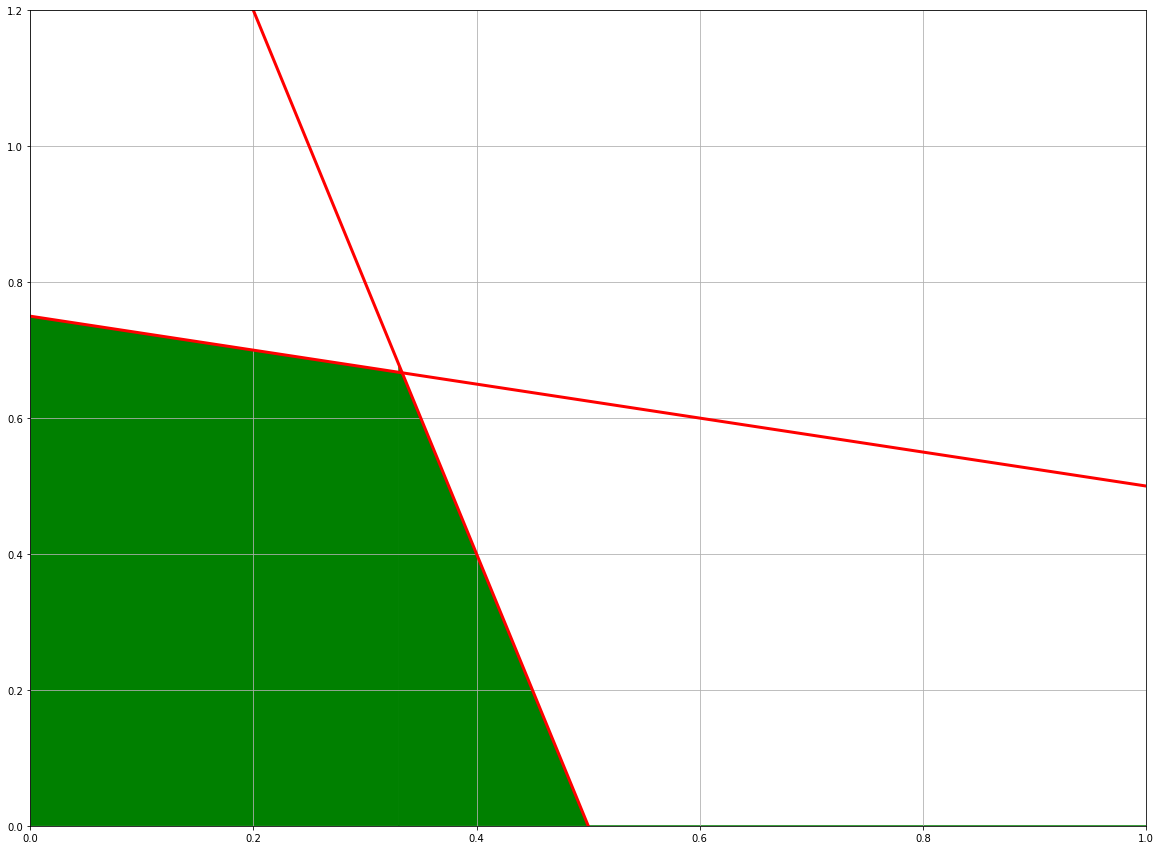

In [3]:
plot_graph()

### Точность $ O(\tau^3, h^3) $

$$ c = \frac{1}{4} - \frac{1}{4}b - \frac{9}{4}a - d $$

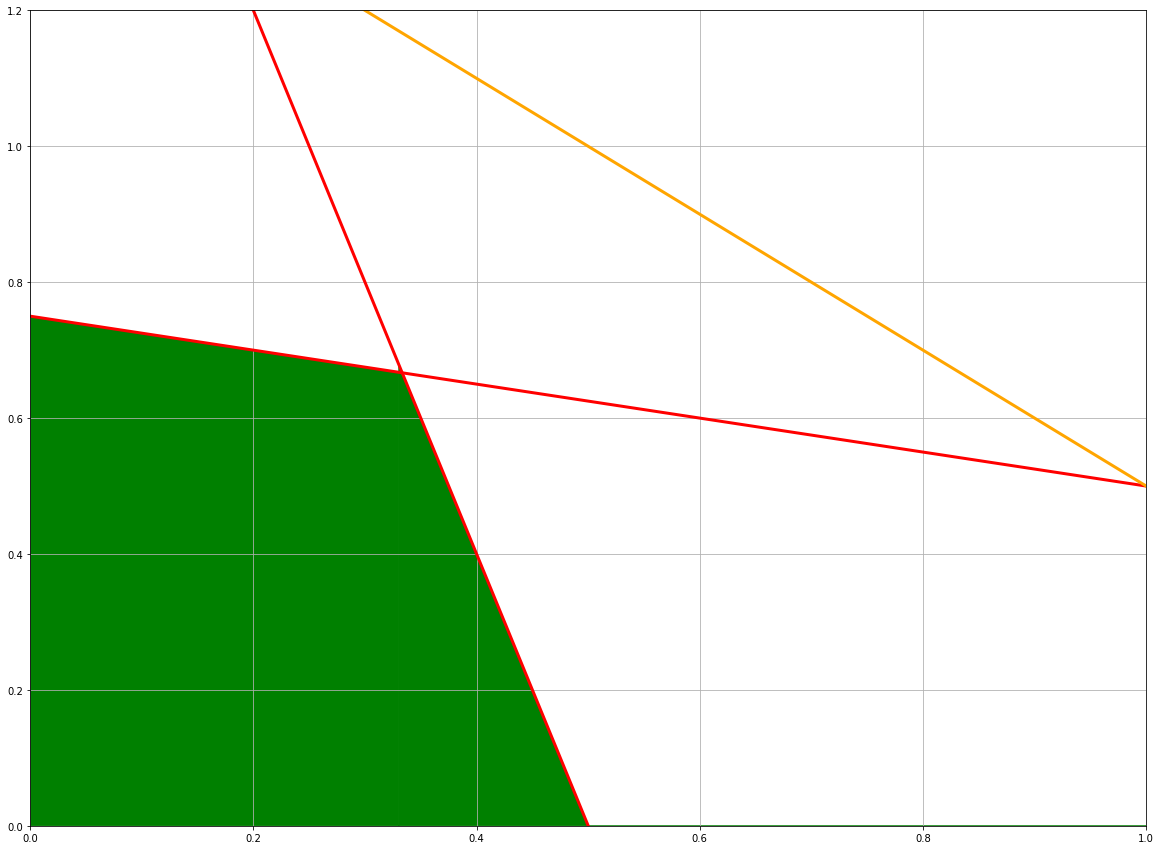

In [4]:
plot_graph('2nd')

## Практическая часть

Решить следующую краевую задачу для уравнения переноса:

\begin{equation*}
 \begin{cases}
   u_t + \lambda u_x = 0, \lambda = 1 \text{ } (t > 0, 0 < x \leqslant X, X = 2)\\
   u(0, x) = \varphi(x) \text{ } (0 \leqslant x \leqslant X)\\
   u(t, 0) = 0 \text{ } (0 < t < 100 \tau) \\
 \end{cases}
\end{equation*}

где $ \varphi(x) = \begin{cases}
1, \text{ при } 0.4 \leqslant x \leqslant 0.6,\\
0, \text{ иначе}
 \end{cases} $
 
на сетке с числом узлов $201$ ($h = 0.01$) для заданного сеточного шаблона и числа Куранта $ \sigma = 0.5 $:

* по четырем монотонным схемам первого порядка аппроксимации – вершинам области монотонных схем, включая схему с минимальной «аппроксимационной вязкостью» из (4т)

* по наименее осциллирующей на разрывных решениях схеме 2-го порядка аппроксимации из (5т)

* по двум схемам 2-го порядка аппроксимации, лежащим на прямой – однопараметрическом множестве схем 2-го порядка аппроксимации – по разные стороны от схемы из (5т)

* по схеме 3-го порядка аппроксимации из (3т)

* по гибридной схеме, полученной с использованием схем из пункта (3п) и сеточно-характеристического критерия монотонности

* по гибридным схемам, полученным с использованием одной из схем из пункта (3п), схемы из пункта (4п) и сеточно-характеристического критерия монотонности

* по гибридной схеме, полученной с одновременным использованием двух схем из пункта (3п), схемы из пункта (4п) и сеточно-характеристического критерия монотонности.


В каждом из пунктов (1п) – (7п) в конечный момент времени, т.е. через $ 100 $ шагов, вывести на одном графике точное решение и численное. Если за время расчета возмущение выходит на правую границу расчетной области – увеличить значение $ X $.